#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import os
import random, warnings
from IPython.display import display


# To ignore all warnings
warnings.filterwarnings("ignore")
# pd.set_option("display.max_rows",None)

# Setting seed for reproducability
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# Loading the data sets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [4]:
# previewing the train dataset
print("\033[1mFirst five rows\n---------------------------------\033[0m")
display(train.head())
print("\033[1mLast five rows\n----------------------------------\033[0m")
display(train.tail())

First five rows
---------------------------------


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


Last five rows
----------------------------------


,id,date,country,store,product,num_sold
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [5]:
# previewing the test dataset
print("\033[1mFirst five rows\n---------------------------------\033[0m")
display(test.head())
print("\033[1mLast five rows\n----------------------------------\033[0m")
display(test.tail())

First five rows
---------------------------------


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


Last five rows
----------------------------------


,id,date,country,store,product
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler
98549,328679,2019-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode


In [6]:
# previewing the sample submission dataset
print("\033[1mFirst five rows\n---------------------------------\033[0m")
display(sample_submission.head())
print("\033[1mLast five rows\n----------------------------------\033[0m")
display(sample_submission.tail())

First five rows
---------------------------------


,id,num_sold
0,230130,100
1,230131,100
2,230132,100
3,230133,100
4,230134,100


Last five rows
----------------------------------


,id,num_sold
98545,328675,100
98546,328676,100
98547,328677,100
98548,328678,100
98549,328679,100


##### Preliminary Data Inspection

In [7]:
# Getting the shape of the train and test dataset
print(f"The train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

The train dataset has 230130 rows and 6 columns
The test dataset has 98550 rows and 5 columns


In [8]:
# Checking the data types of columns in the dataset
print(train.dtypes)
print(f"____________________________\n{train.dtypes.value_counts()}")

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object
____________________________
object     4
int64      1
float64    1
Name: count, dtype: int64


In [9]:
# Getting the 'data' about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None


In [10]:
# Obtaining the summary descriptive statistics of the data
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,230130.0,NaN,NaN,NaN,115064.5,66432.953062,0.0,57532.25,115064.5,172596.75,230129.0
date,230130,2557,2010-01-01,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,230130,6,Canada,38355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,230130,3,Discount Stickers,76710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,230130,5,Holographic Goose,46026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,221259.0,NaN,NaN,NaN,752.527382,690.165445,5.0,219.0,605.0,1114.0,5939.0


* The num_sold column has missing values. 
* The mininum amount of stickers sold is 5 and the maximum is 5,939 stickers.
* The id column should be casted to object.
* The date column should be of datetime type.
* Four columns in the data set are of object datatype and two are numerical.

#### Data Preparation
##### Data cleaning
* Checking for missing values and handling them
* Checking for duplicates and handling them
* Converting the incorrect datatypes to the correct ones.

In [11]:
# Checking for missing values in the train data set
train.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [12]:
test.isna().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [13]:
# Checking the percentage of missing values in num_sold column
percent_missing_num_sold = train["num_sold"].isnull().sum() * 100 / len(train["num_sold"])
print(percent_missing_num_sold)

3.854777734324078


In [14]:
null_values = train[train["num_sold"].isnull()]
null_values.head(10)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN
225,225,2010-01-03,Kenya,Discount Stickers,Holographic Goose,NaN
270,270,2010-01-04,Canada,Discount Stickers,Holographic Goose,NaN
315,315,2010-01-04,Kenya,Discount Stickers,Holographic Goose,NaN
320,320,2010-01-04,Kenya,Stickers for Less,Holographic Goose,NaN
360,360,2010-01-05,Canada,Discount Stickers,Holographic Goose,NaN


The missing values in the num_sold column are missing at random

In [15]:
# Dropping the missing values in the num_sold column
train = train.dropna()

In [16]:
# Checkin if dropping is successful
train.isna().any()

id          False
date        False
country     False
store       False
product     False
num_sold    False
dtype: bool

In [17]:
# Checking for duplicates
train.duplicated().any()

False

##### Type casting the incorrect data types to the correct ones

In [18]:
# Convertin id column from int64 to a string
train["id"]= train["id"].values.astype(str)

In [19]:
# Conveing the date column from object to datetime data type
train["date"]=pd.to_datetime(train["date"])

In [20]:
# Checking the datatypes
train.dtypes

id                  object
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

### Exploratory Data Analysis
In this section, trends and patterns are examined using statistics and visualizations to demonstrate the relationships between the variables in the data.

#### 1. Univariate Analysis

#### `date`

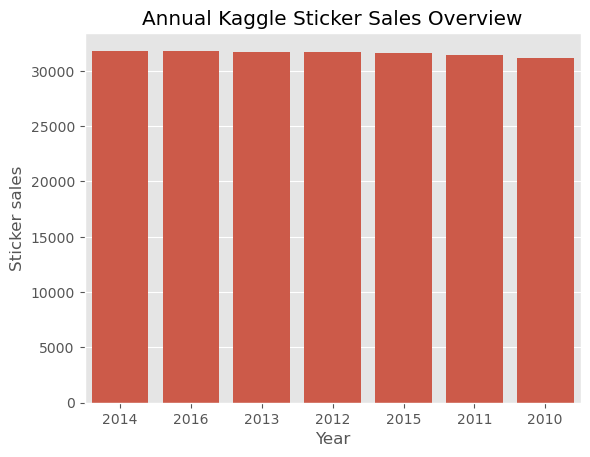

In [21]:
# Counting the number of stickers sold over the years
year_counts = train.date.dt.year.value_counts().sort_values(ascending=False).index

# plot to show the sales over the years
sns.countplot(x=train.date.dt.year, order=year_counts)

plt.xlabel("Year")
plt.ylabel("Sticker sales")
plt.title("Annual Kaggle Sticker Sales Overview")
plt.show()


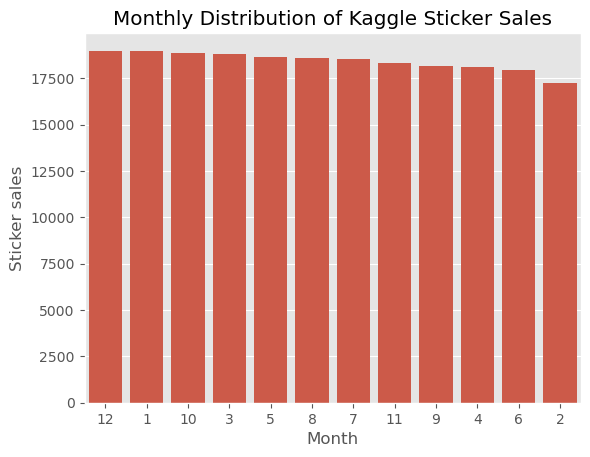

In [22]:
# Counting the number of stickers sold over the years
month_counts = train.date.dt.month.value_counts().sort_values(ascending=False).index

# plot to show the sales over the years
sns.countplot(x=train.date.dt.month, order=month_counts)

plt.xlabel("Month")
plt.ylabel("Sticker sales")
plt.title("Monthly Distribution of Kaggle Sticker Sales")
plt.show()

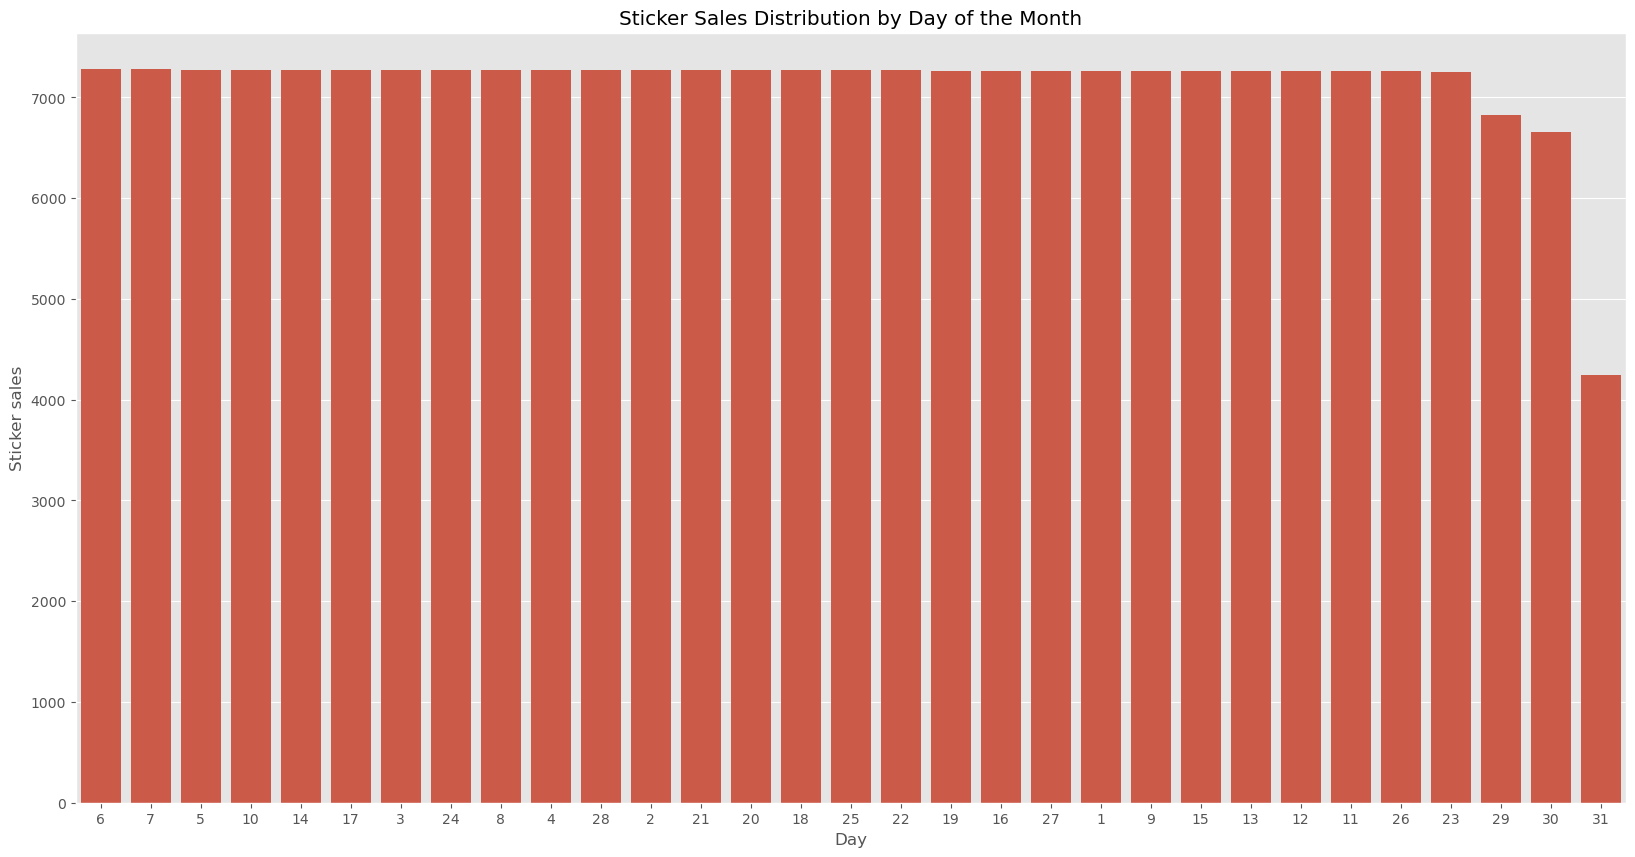

In [23]:
plt.figure(figsize=(20,10))
# Counting the number of stickers sold over the years
day_counts = train.date.dt.day.value_counts().sort_values(ascending=False).index

# plot to show the sales over the years
sns.countplot(x=train.date.dt.day, order=day_counts)

plt.xlabel("Day")
plt.ylabel("Sticker sales")
plt.title("Sticker Sales Distribution by Day of the Month") 
plt.show()

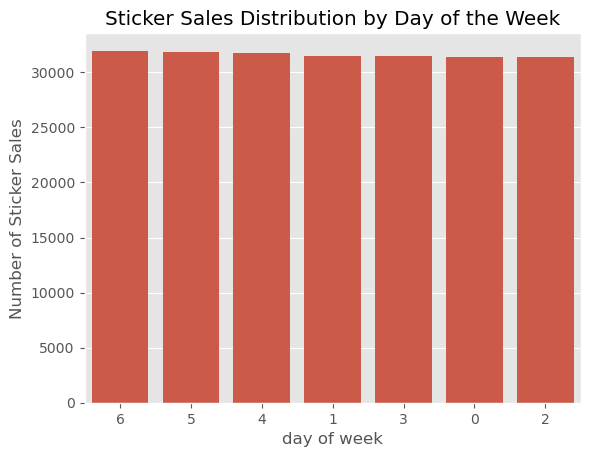

In [24]:
# Counting the number of stickers sold by the day of the week
dayofweek_counts = train.date.dt.dayofweek.value_counts().sort_values(ascending=False).index

# plot to show the sales over the years
sns.countplot(x=train.date.dt.dayofweek, order=dayofweek_counts)

plt.xlabel("day of week")
plt.ylabel("Number of Sticker Sales")
plt.title("Sticker Sales Distribution by Day of the Week") 
plt.show()

#### `Country`

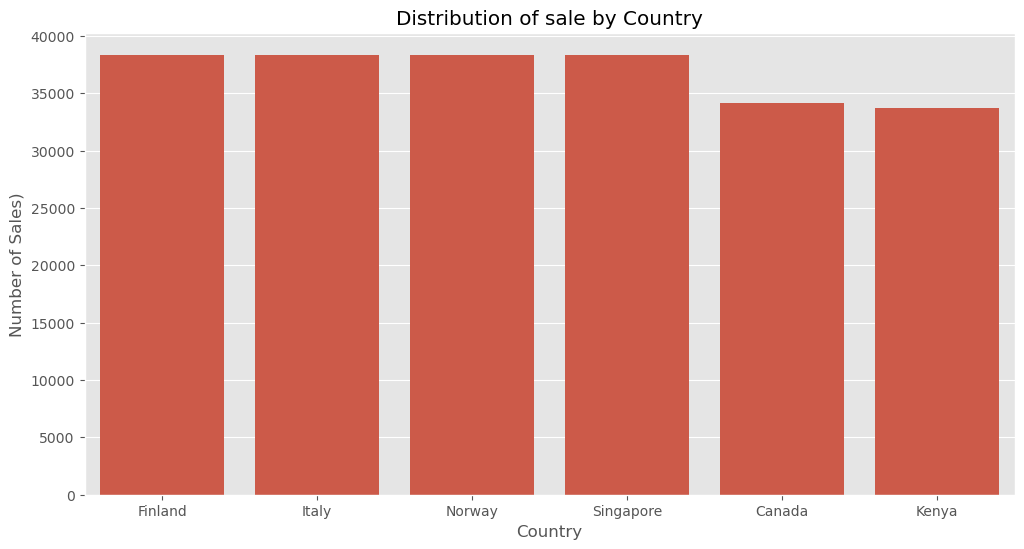

In [25]:
plt.figure(figsize=(12,6))

# Count of sales made in a country
country_sale=train.country.value_counts().sort_values(ascending=False).index

# plotting the distribution of countries
sns.countplot(x=train.country, order=country_sale)
plt.xlabel("Country")
plt.ylabel("Number of Sales)")
plt.title("Distribution of sale by Country")
plt.show();

#### `Store`

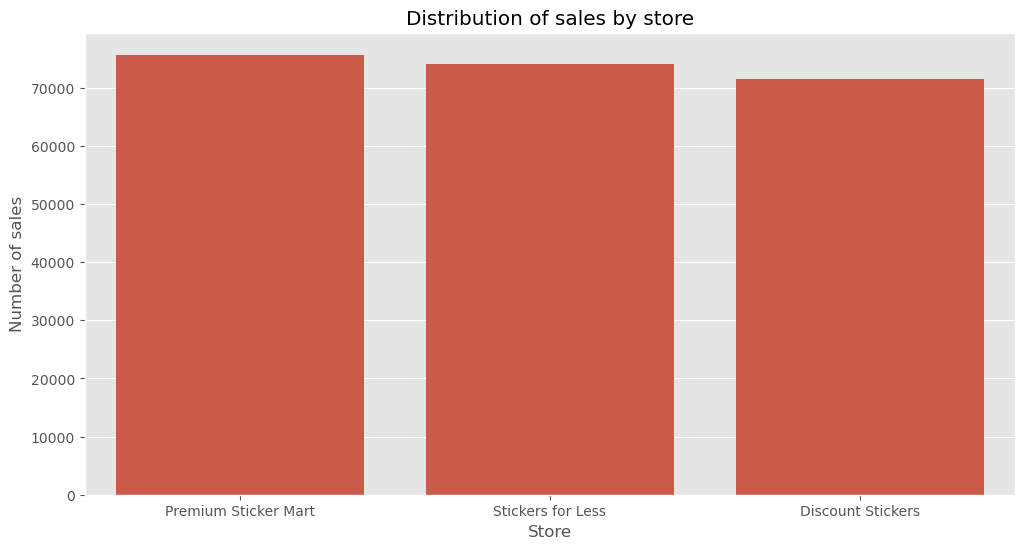

In [26]:
plt.figure(figsize=(12,6))

# Count of sales made in a store
store_sale=train.store.value_counts().sort_values(ascending=False).index

# plotting the distribution of sales
sns.countplot(x=train.store, order=store_sale)
plt.xlabel("Store")
plt.ylabel("Number of sales")
plt.title("Distribution of sales by store")
plt.show();

#### `product`

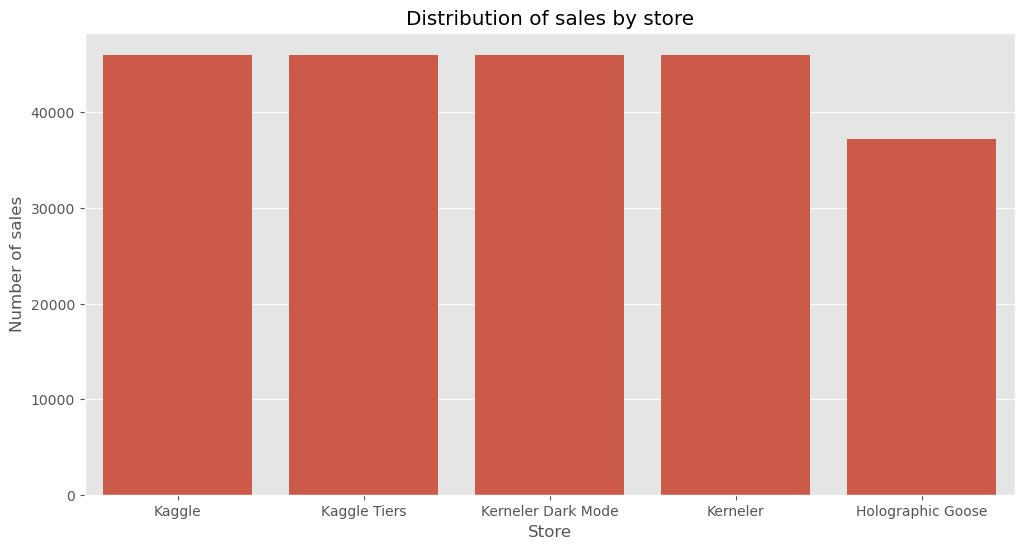

In [27]:
plt.figure(figsize=(12,6))

# Count of sales made for a product
product_sale=train["product"].value_counts().sort_values(ascending=False).index

# plotting the distribution of products
sns.countplot(x=train["product"], order=product_sale)
plt.xlabel("Store")
plt.ylabel("Number of sales")
plt.title("Distribution of sales by store")
plt.show();

##### Observation
1. Sales of Kaggle stickers appear consistent across the years.
2. Sticker sales are highest during the first and last months of the year.
3. The lowest sales occur during the last three days of each month.
4. Stickers sale are highest on the weekend.
5. Most sticker sales are made from premium sticker mart.
6. Stickers sales is highest in finland and lowest in kenya
7. Holographic goose stickers has the lowest sales

### Bivariant analysis
##### What is the relationship between `date` and `num_sold`

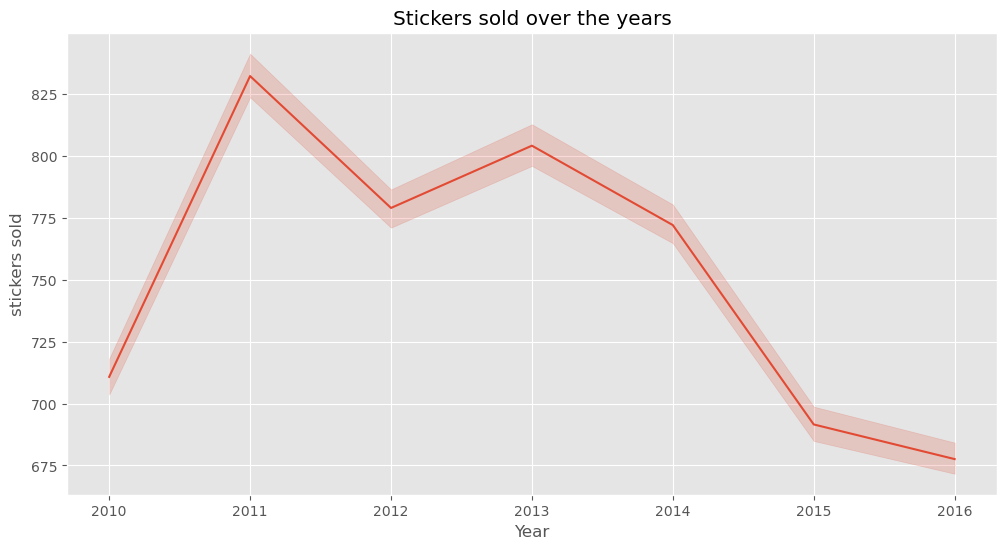

In [47]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a line plot to show number of stickers sold on different years
sns.lineplot(data=train, x=train.date.dt.year, y=train["num_sold"])

# Labelling the graph
plt.xlabel("Year")
plt.ylabel("stickers sold")
plt.title("Stickers sold over the years")
plt.show()

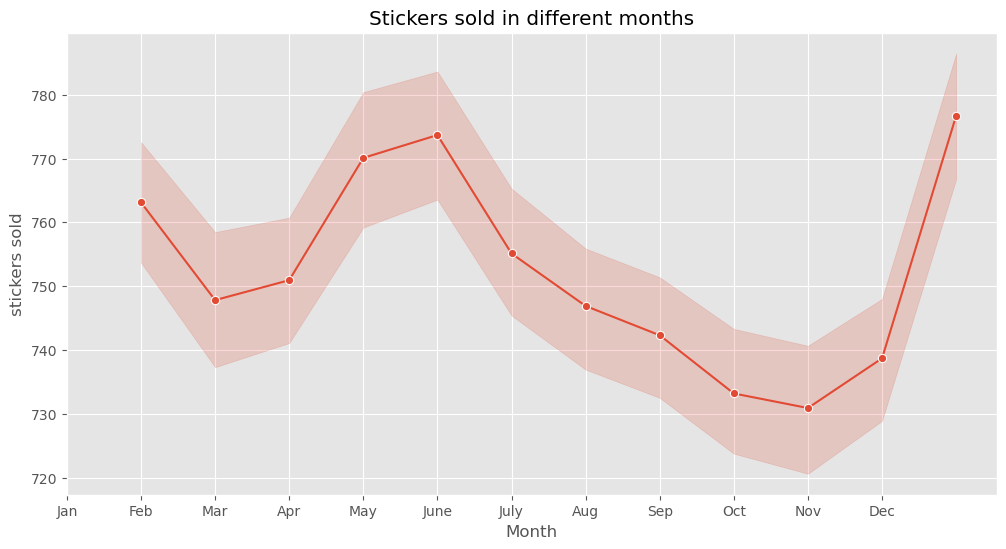

In [55]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a line plot to show number of stickers sold on different months
sns.lineplot(data=train, x=train.date.dt.month, y=train["num_sold"], marker="o")

# # Mapping numbers to days of the week
# month = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
# plt.xticks(ticks=range(12), labels=month)

# Labelling the graph
plt.xlabel("Month")
plt.ylabel("stickers sold")
plt.title("Stickers sold in different months")
plt.show()

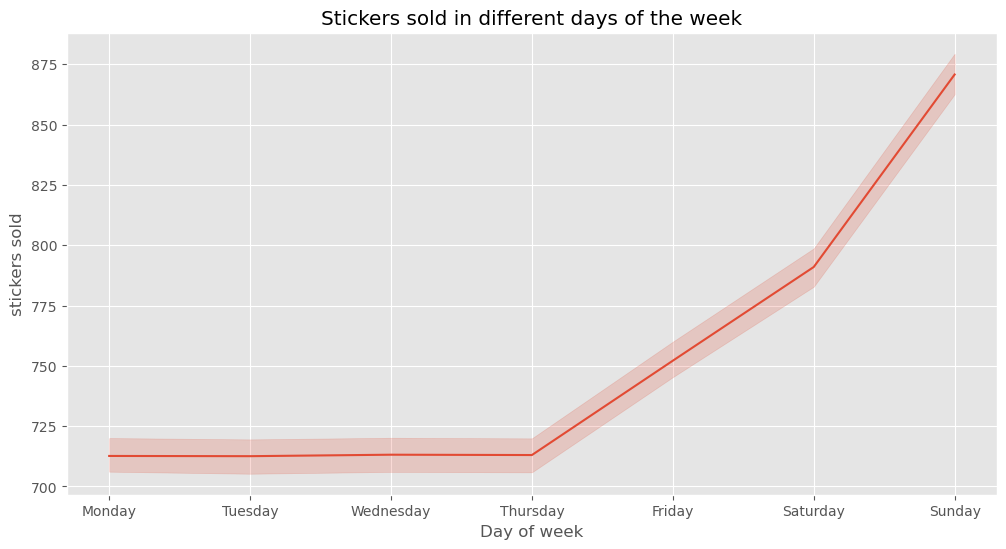

In [53]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a line plot to show number of stickers sold on different days of the week
sns.lineplot(data=train, x=train.date.dt.dayofweek, y=train["num_sold"])

# Mapping numbers to days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=range(7), labels=days_of_week) 

# Labelling the graph
plt.xlabel("Day of week")
plt.ylabel("stickers sold")
plt.title("Stickers sold in different days of the week")
plt.show()

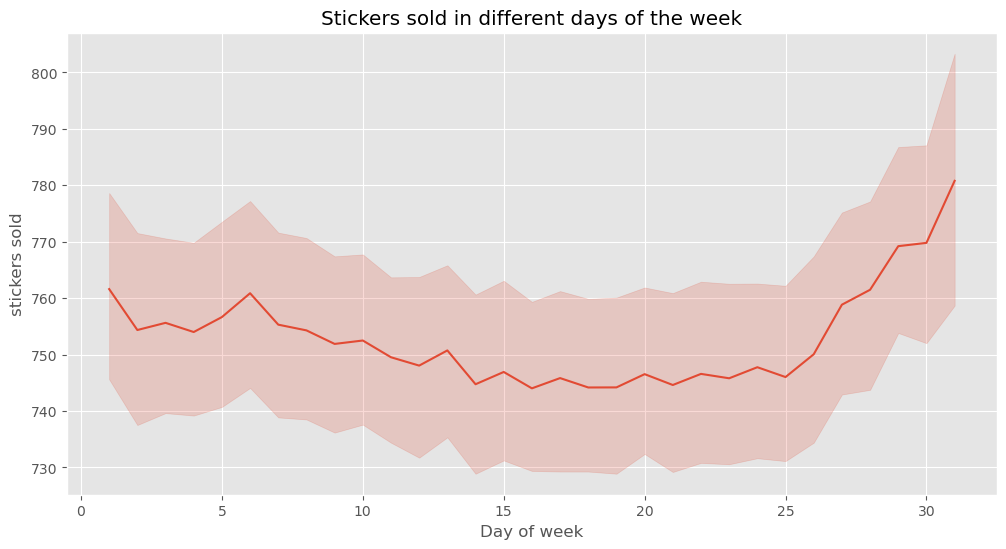

In [54]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a line plot to show number of stickers sold on different days of the month
sns.lineplot(data=train, x=train.date.dt.day, y=train["num_sold"])

# Labelling the graph
plt.xlabel("Day of the month")
plt.ylabel("stickers sold")
plt.title("Stickers sold in different days of the month")
plt.show()

##### What is the relationship between `country` and `num_sold`

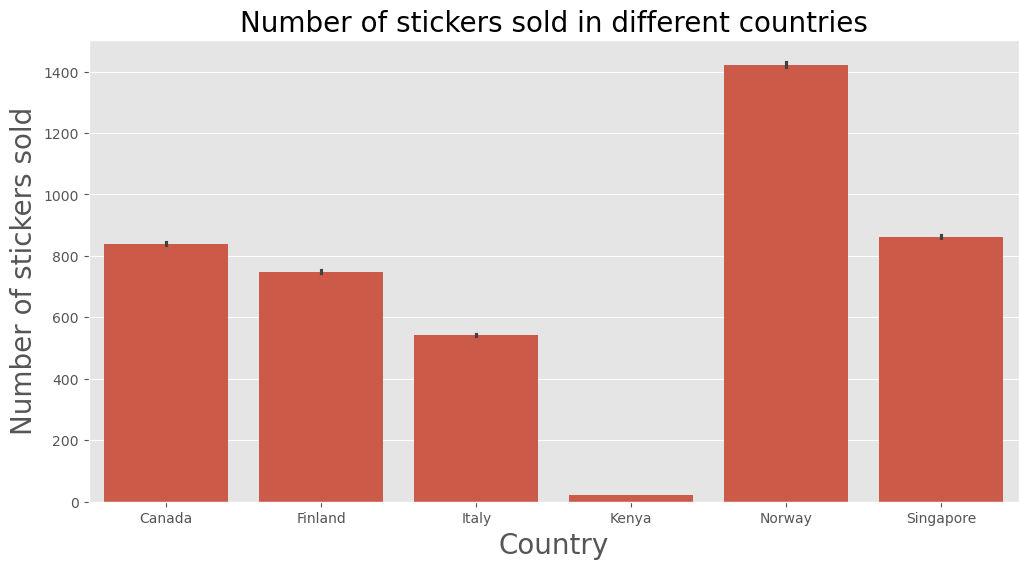

In [35]:
# Setting the size of the plot
plt.figure(figsize=(12,6))
# Barplot to show the number of stickers sold in differnt countries
sns.barplot(data=train, x="country",y="num_sold")

# Labelling the graph
plt.xlabel("Country",fontsize=20)
plt.ylabel("Number of stickers sold",fontsize=20)
plt.title("Number of stickers sold in different countries",fontsize=20)
plt.show()

In [31]:
train.country.value_counts()

country
Finland      38355
Italy        38355
Norway       38355
Singapore    38355
Canada       34109
Kenya        33730
Name: count, dtype: int64

In [30]:
train.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')